In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784)
    x_train = x_train / 255.0
    x_test = x_test.reshape(-1, 784)
    x_test = x_test / 255.0
    return x_train, y_train, x_test, y_test

In [5]:
def one_hot(labels):
    num_classes = np.max(labels) + 1
    encoded_labels = np.eye(num_classes)[labels]
    return encoded_labels

In [99]:
class NeuralNetwork:

    def __init__(self):
        self.hidden_units = 256
        self.num_classes = 10
        self.learning_rate = 0.01
        self.steps = 100

        self.W1 = np.random.randn(784, self.hidden_units) * 0.01
        self.b1 = np.random.randn(self.hidden_units)
        self.W2 = np.random.randn(self.hidden_units, self.num_classes) * 0.01
        self.b2 = np.random.randn(self.num_classes)

        self.loss_history = np.zeros(self.steps)

    def softmax(self, z):
        exp = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def d_relu(self, z):
        return np.array(z > 0, dtype = np.float32)

    def forward(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.relu(z1)

        z2 = np.dot(a1, self.W2) + self.b2
        prob = self.softmax(z2)

        return prob, a1

    def loss(self, X, y):
        prob, a1 = self.forward(X)
        m = y.shape[0]
        loss = -np.sum(y * np.log(prob + 1e-8)) / m
        return loss

    def train(self, X, y):
        m = X.shape[0]
        
        for i in range(self.steps):
            prob, a1 = self.forward(X)

            dZ2 = prob - y
            dW2 = np.dot(a1.T, dZ2) / m
            db2 = np.mean(dZ2, axis=0)
            dZ1 = np.dot(dZ2, self.W2.T) * self.d_relu(a1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.mean(dZ1, axis=0)

            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1

            loss = self.loss(X, y)
            self.loss_history[i] = loss
    
    def predict(self, X):
        probabilities, a1  = self.forward(X)
        predictions = np.argmax(probabilities, axis=1)
        return predictions

    # def accuracy(self, X, y):
    #     prob, a1 = self.forward(X)
    #     pred = np.argmax(prob, 1)
    #     y1 = np.argmax(y, 1)
    #     accuracy = np.mean(pred == y1)
    #     return accuracy
    
    def accuracy(self, X, y):
        prob, a1 = self.forward(X)
        pred = np.argmax(prob, 1)
        y1 = np.argmax(y, 1)
        accuracy = np.mean(pred == y1)
        return accuracy

    

In [86]:
model = NeuralNetwork()

x_train, y_train, x_test, y_test = load_mnist()
y1 = y_train
y_train = one_hot(y_train)
y2 = y_test
y_test = one_hot(y_test)

model.train(x_train, y_train)

In [100]:
model.train(x_train, y_train)

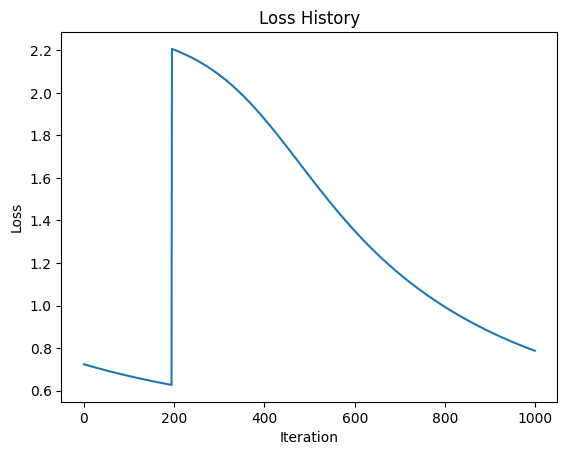

In [97]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

In [98]:
model.accuracy(x_test, y_test)

0.852

In [77]:
prob, a1 = model.forward(x_train)
print(prob)
pred = np.argmax(prob, 1)
pred
y1 = np.argmax(y_train, 1)
print(y1)
print(y_train)
print(np.argmax(prob, 1))
print(np.argmax(prob[50]))
print(prob[10])

[[9.04691257e-02 1.84967118e-02 5.85505777e-02 ... 2.96296680e-02
  1.41421349e-01 2.64061579e-02]
 [8.50809562e-01 8.70483102e-05 8.86524460e-03 ... 2.33760666e-03
  1.06343547e-02 2.12439568e-03]
 [2.49874932e-02 1.18680942e-02 5.17820531e-02 ... 1.19499506e-01
  5.83383372e-02 2.01109085e-01]
 ...
 [3.96440939e-02 1.81849654e-02 1.24813468e-02 ... 1.14442078e-01
  1.24891628e-01 1.29685468e-01]
 [1.75280979e-01 5.14360011e-03 9.82090202e-02 ... 2.68391459e-02
  3.69259108e-02 4.18056460e-02]
 [6.31259561e-02 2.84514019e-02 1.06867926e-01 ... 7.49710597e-02
  1.75409262e-01 1.04349343e-01]]
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[3 0 4 ... 5 6 5]
3
[0.0096696  0.0549085  0.04186753 0.59898014 0.00379349 0.10894882
 0.00677193 0.01023559 0.15450157 0.01032281]


In [60]:
def accuracy(pred, labels):
    return np.mean(pred == labels)

In [79]:
accuracy(pred, y1)

0.7827

In [33]:
prob, a1 = model.forward(x_test)
y1 = np.argmax(y_test, 1)
print(y1)
pred = np.argmax(prob, 1)
accuracy(pred, y1)
pred

[7 2 1 ... 4 5 6]


(10000,)

In [55]:
j = 0
for i in range(len(y1)):
    if y1[i] == np.argmax(prob[i]):
        print(prob[i])
        j += 1

j / 10000

[0.20964566 0.0634359  0.08175671 0.09255467 0.0817995  0.11305261
 0.09541733 0.08956896 0.08679427 0.08597439]
[0.06263247 0.18435372 0.10292319 0.10738914 0.08755853 0.08204489
 0.08783398 0.09300204 0.10713642 0.08512561]
[0.06300595 0.17076866 0.09554003 0.10813468 0.08984198 0.08522173
 0.09078846 0.10388086 0.09851585 0.09430179]
[0.11605073 0.08480607 0.09734515 0.12308214 0.0936919  0.09717422
 0.08758    0.09610071 0.11040184 0.09376724]
[0.06352099 0.17813759 0.09077831 0.10242329 0.09106824 0.08682213
 0.08839039 0.10726616 0.09508784 0.09650507]
[0.10425308 0.10872146 0.09487992 0.13863205 0.08150835 0.10214536
 0.08911896 0.08765156 0.10766227 0.08542699]
[0.10779223 0.0897664  0.10734812 0.08895681 0.10293077 0.08812834
 0.12376182 0.09805923 0.09441878 0.0988375 ]
[0.061721   0.1841245  0.09212436 0.1050312  0.08910595 0.08630527
 0.08774327 0.10363656 0.09728376 0.09292413]
[0.09829289 0.08994691 0.07937809 0.08276937 0.11419347 0.08936157
 0.08529732 0.14925699 0.0838

2.8163